<a href="https://colab.research.google.com/github/Svhugani/DarkDust/blob/main/BreastCancerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
breast_cancer.data.shape

(569, 30)

In [5]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
breast_cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [7]:
data = breast_cancer.data
target = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

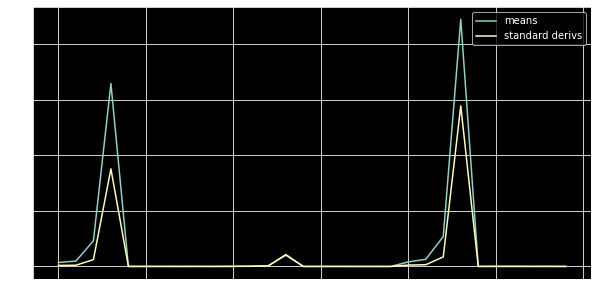

In [8]:
# data before preprocessing

data_features_means = [x_train[:, i].mean() for i in range(x_train.shape[1])]
data_features_std = [x_train[:, i].std() for i in range(x_train.shape[1])]

plt.subplots(figsize = (10,5))
plt.plot(data_features_means, label = 'means')
plt.plot(data_features_std, label = 'standard derivs')
plt.legend()
plt.grid()

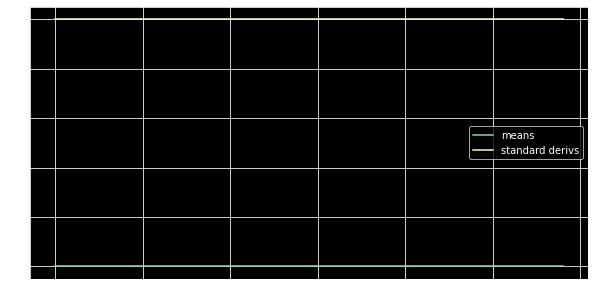

In [9]:
# data after processing

#scaler = RobustScaler(quantile_range=(25, 75))
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

data_features_means = [x_train[:, i].mean() for i in range(x_train.shape[1])]
data_features_std = [x_train[:, i].std() for i in range(x_train.shape[1])]

plt.subplots(figsize = (10,5))
plt.plot(data_features_means, label = 'means')
plt.plot(data_features_std, label = 'standard derivs')
plt.legend()
plt.grid()

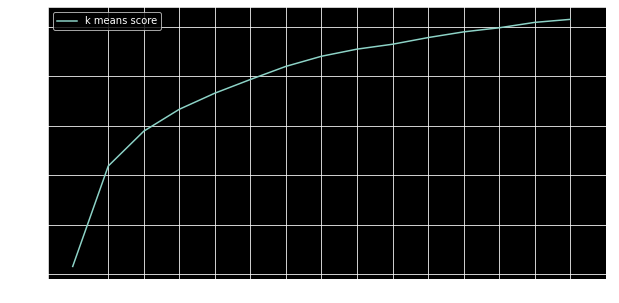

In [10]:
# K-means clustering form many possible scenarios
cluster_numbers = range(1, 16)
k_means_classificators = [KMeans(n_clusters = i, max_iter = 100).fit(x_test) for i in cluster_numbers]
k_means_scores = [k_means_classificators[i].score(x_test) for i in range(len(k_means_classificators))]

plt.subplots(figsize = (10,5))
plt.plot(k_means_scores, label = 'k means score')
plt.xticks(cluster_numbers)
plt.legend()
plt.grid()

In [11]:
# 2-clusterring ('malignant', 'benign')

k_means_binary = k_means_classificators[1]
k_means_binary.inertia_
k_means_binary.score(x_test)

-2406.623891506061

In [12]:
k_means_prediction = k_means_binary.predict(x_test)
k_means_prediction

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1], dtype=int32)

In [13]:
#k_means_fitting = k_means_binary.predict(x_train)
#misclassified_idx = np.where(k_means_fitting == y_train)[0]
#k_means_accuracy = len(misclassified_idx)/ float(len(y_train))
#print("k-means validation accuracy for k=2 equals: " + str(np.round(k_means_accuracy * 100, 2)) + "%")

In [14]:
# K- means clustering for k = 2 ( only that makes sense since we want binary classification)
misclassified_idx = np.where(k_means_prediction == y_test)[0]
k_means_accuracy = len(misclassified_idx)/ float(len(y_test))
k_means_accuracy = max( k_means_accuracy, 1-k_means_accuracy) # we only cluster, so for example all 1s may be classified as 0s. It is irrelevant
print("k-means validation accuracy for k=2 equals: " + str(np.round(k_means_accuracy * 100, 2)) + "%")

k-means validation accuracy for k=2 equals: 88.6%




---


K-means method for 2-categories clustering classifies into 2 groups properly  with accuracy around 85-92% (small dataset). 
Clustering method suggests around 5 significant categories. It could be the for example for the stage of the cancer (?). For RobustScaler which scales a bit differently the resuts, we get accuracy around 2%% higher on average (still may be variance). 


---



In [15]:
# linear regression classification
N, D = x_train.shape
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape = (D, ), activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
result = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100)


Epoch 1/100
15/15 [==============================] - 1s 33ms/step - loss: 1.0139 - accuracy: 0.4226 - val_loss: 0.8998 - val_accuracy: 0.4649
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8624 - accuracy: 0.4595 - val_loss: 0.7927 - val_accuracy: 0.5175
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7741 - accuracy: 0.5717 - val_loss: 0.7001 - val_accuracy: 0.5965
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.5769 - val_loss: 0.6196 - val_accuracy: 0.6754
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5851 - accuracy: 0.6856 - val_loss: 0.5535 - val_accuracy: 0.7281
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7592 - val_loss: 0.5006 - val_accuracy: 0.7544
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4568 - accuracy: 0.8156 - val_loss: 0.4568 - val_accuracy: 0.8246
Epoch 8/100


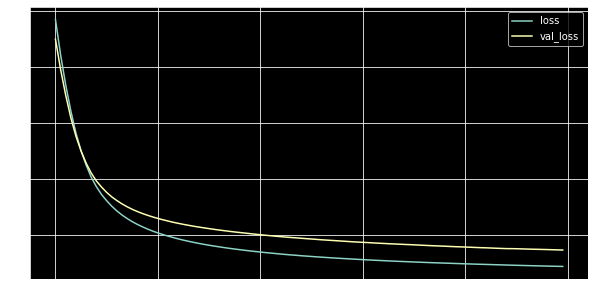

In [16]:
plt.subplots(figsize = (10,5))
plt.plot(result.history['loss'], label = 'loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.grid()
plt.legend()

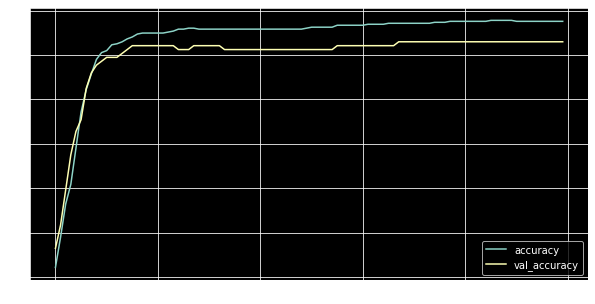

In [17]:
plt.subplots(figsize = (10,5))
plt.plot(result.history['accuracy'], label = 'accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.grid()
plt.legend()

In [19]:
# compare methods
val_acc_k2 = np.round(k_means_accuracy, 2) 
val_acc_nn = np.round(result.history['val_accuracy'][-1], 2)

print('accuracy with k-means clustering for k=2: ' + str(val_acc_k2 * 100) + '%')
print('accuracy with linear regression on test set: ' + str(val_acc_nn * 100) + '%')

accuracy with k-means clustering for k=2: 89.0%
accuracy with linear regression on test set: 93.0%
